# Project 2 - Energy Services - Diana Bernardo 90384
#  Energy Demand Forecast of Civil Building

## Regressions

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

C:\Users\Diana Sofia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Diana Sofia\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Import data to train (file from project 1 at the end of feature selection)
df_model = pd.read_csv('Civil_Total_Hourly_Model.csv')
df_model = df_model.set_index('Date')
df_model

,Power (kW),Day type,Weekday,Hour,Temperature (C),Solar Rad (W/m2),Power-1
Date,,,,,,,
2017-01-01 01:00:00,75.173557,1,6,1,7.930000,1.477333,74.897706
2017-01-01 02:00:00,74.208175,1,6,2,7.263417,1.415083,75.173557
2017-01-01 03:00:00,73.735889,1,6,3,6.831333,1.542000,74.208175
2017-01-01 04:00:00,75.102351,1,6,4,6.500250,0.891000,73.735889
2017-01-01 05:00:00,75.787300,1,6,5,6.006417,1.375833,75.102351
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,99.453746,3,0,19,13.361667,1.112333,142.270707
2018-12-31 20:00:00,83.188111,3,0,20,12.810000,1.322417,99.453746
2018-12-31 21:00:00,82.704752,3,0,21,12.565000,1.195500,83.188111


In [3]:
# Import 2019 prepared data
df_2019 = pd.read_csv('clean.csv')
df_2019 = df_2019.set_index('Date')
df_2019

,Power (kWh),Day type,Weekday,Hour,Temperature (C),Solar Rad (W/m2),Power-1
Date,,,,,,,
2019-01-01 01:00:00,94.166,1,1,1,10.377500,1.728667,93.576
2019-01-01 02:00:00,94.725,1,1,2,10.260833,2.674750,94.166
2019-01-01 03:00:00,97.048,1,1,3,9.666667,2.444250,94.725
2019-01-01 04:00:00,95.032,1,1,4,8.640833,3.056333,97.048
2019-01-01 05:00:00,96.062,1,1,5,9.093333,2.426417,95.032
...,...,...,...,...,...,...,...
2019-03-31 19:00:00,107.445,1,6,19,14.616667,4.017500,105.657
2019-03-31 20:00:00,107.570,1,6,20,14.734167,3.004167,107.445
2019-03-31 21:00:00,105.740,1,6,21,14.730000,4.528917,107.570


### Split Data into training and test data

In [4]:
# Create vector with inputs and outputs
# Create matrix from data frame
Z=df_model.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,5,6]] 

In [5]:
# Generate training data for model training and test data for model evaluation
# By default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
print(X_train)
print(y_train) 

[[0.00000000e+00 4.00000000e+00 1.50000000e+01 1.91500000e+01
  2.98541667e+02 3.22586829e+02]
 [1.00000000e+00 6.00000000e+00 6.00000000e+00 1.85833333e+01
  1.49740833e+01 1.00767710e+02]
 [3.00000000e+00 0.00000000e+00 0.00000000e+00 1.80691667e+01
  4.61416667e-01 8.42892224e+01]
 ...
 [0.00000000e+00 3.00000000e+00 1.30000000e+01 1.39916667e+01
  8.01583333e+02 3.74395180e+02]
 [0.00000000e+00 3.00000000e+00 1.70000000e+01 1.18575000e+01
  4.55350000e+00 3.47281653e+02]
 [1.00000000e+00 5.00000000e+00 0.00000000e+00 1.36350791e+01
  1.34188196e+00 1.12032528e+02]]
[311.0427241 100.3780835  80.8373686 ... 372.027829  333.6689557
 101.8625219]


### Data to predict

In [6]:
# Data one wants to predict
Z2=df_2019.values
# Identify output Y2
Y2=Z2[:,0]
# Identify input X2
X2=Z2[:,[1,2,3,4,5,6]] 

### Linear Regression

In [7]:
# Import libraries
from sklearn import  linear_model

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train,y_train)
# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)

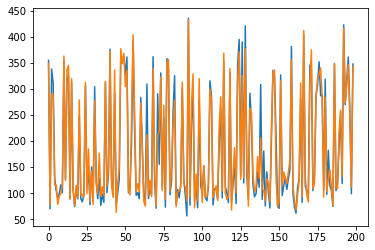

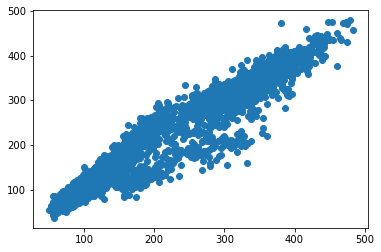

In [9]:
plt.plot(y_test[1:200])
# Overimpose the predicted set on the tested set
plt.plot(y_pred_LR[1:200]) 
plt.show()
# Scatter plot showing a relation between the predicted and tested values - the more linear the better
plt.scatter(y_test,y_pred_LR) 

In [10]:
# Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)
LR_errors = np.array([MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR]) 

18.01367329303394 681.277630044104 26.1012955625598 0.14685105497334713


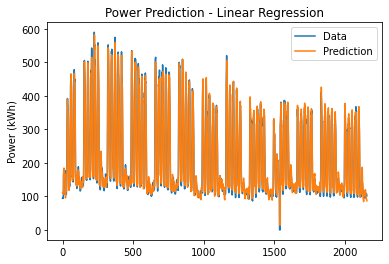

In [11]:
# 2019 data prediction
y2_pred_LR = regr.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_LR, label='Prediction')
plt.legend()
plt.ylabel('Power (kWh)')
plt.title('Power Prediction - Linear Regression')
plt.show()

Text(0, 0.5, 'Power Prediction (kWh)')

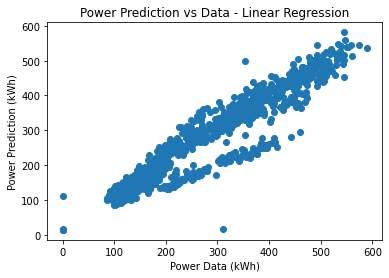

In [12]:
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_LR)
plt.title('Power Prediction vs Data - Linear Regression')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [13]:
# Evaluate errors from 2019 data prediction
MAE_LR=metrics.mean_absolute_error(Y2,y2_pred_LR) 
MSE_LR=metrics.mean_squared_error(Y2,y2_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(Y2)
print(MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR)
LR_errors2 = np.array([MAE_LR, MSE_LR, RMSE_LR,cvRMSE_LR]) 

20.862403381600295 1063.4738639292582 32.61094699528454 0.1499345528256982


### Support Vector Regressor 

In [14]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [15]:
ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [16]:
regr = SVR(kernel='rbf')
regr.fit(X_train_ss,y_train_ss)

C:\Users\Diana Sofia\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

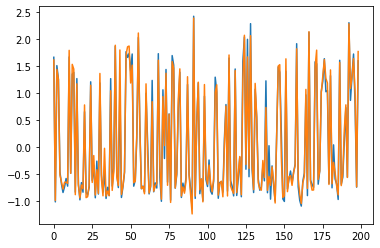

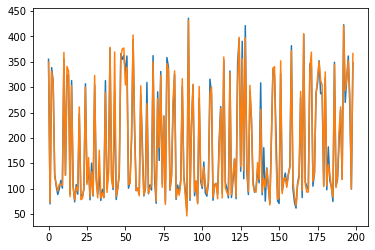

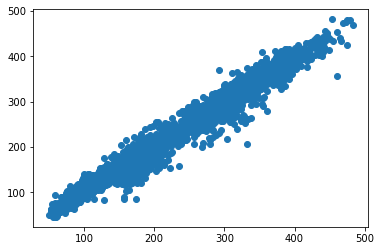

In [17]:
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1)) # It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [18]:
# Evaluate errors
MAE_SVR=metrics.mean_absolute_error(y_test,y_pred_SVR2) 
MSE_SVR=metrics.mean_squared_error(y_test,y_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
print(MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR)
SVR_errors = np.array([MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR])

9.892409831038078 215.7628582074985 14.688868513520655 0.08264248157357523


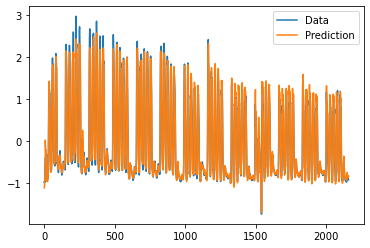

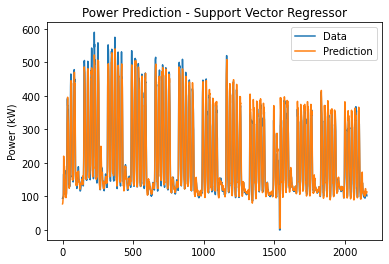

Text(0, 0.5, 'Power Prediction (kWh)')

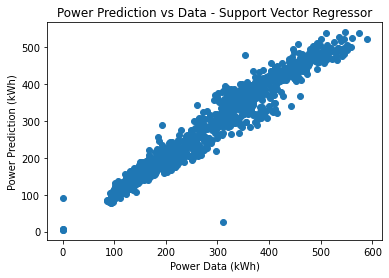

In [19]:
# 2019 data prediction
y2_pred_SVR = regr.predict(ss_X.fit_transform(X2))
Y2_SVR=ss_y.fit_transform(Y2.reshape(-1,1)) 
y2_pred_SVR2=ss_y.inverse_transform(y2_pred_SVR.reshape(-1,1))

plt.plot(Y2_SVR, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_SVR, label='Prediction')
plt.legend()
plt.show()

plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_SVR2, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Support Vector Regressor')
plt.show()

# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_SVR2)
plt.title('Power Prediction vs Data - Support Vector Regressor')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [20]:
# Evaluate errors from 2019 data prediction
MAE_SVR=metrics.mean_absolute_error(Y2,y2_pred_SVR2) 
MSE_SVR=metrics.mean_squared_error(Y2,y2_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(Y2)
print(MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR)
SVR_errors2 = np.array([MAE_SVR, MSE_SVR, RMSE_SVR,cvRMSE_SVR]) 

13.459442569614671 444.88912936319497 21.092395059907137 0.09697598851659932


### Decision Tree Regressor

In [21]:
# Import libraries
from sklearn.tree import DecisionTreeRegressor

In [22]:
# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor()

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

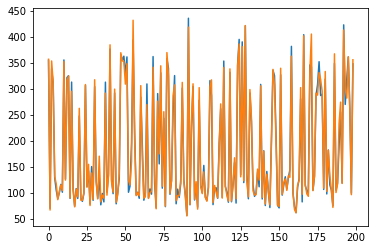

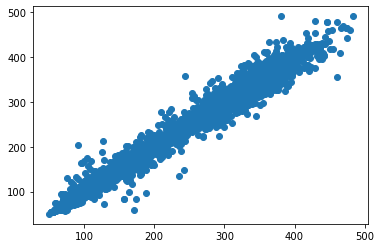

In [23]:
plt.plot(y_test[1:200])
plt.plot(y_pred_DT[1:200])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [24]:
# Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
print(MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT)
DTR_errors = np.array([MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT])

9.23239825478128 219.32621326874116 14.809666210578182 0.0833221133262877


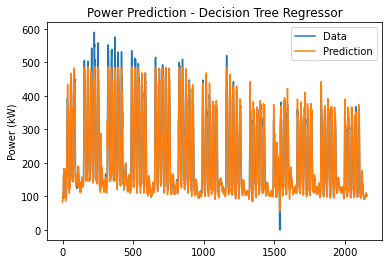

Text(0, 0.5, 'Power Prediction (kWh)')

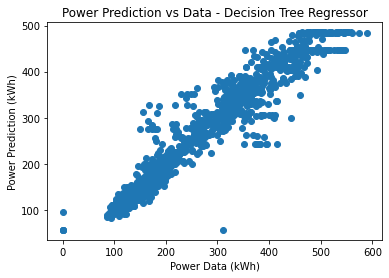

In [25]:
# 2019 data prediction
y2_pred_DT = DT_regr_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_DT, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Decision Tree Regressor')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_DT) 
plt.title('Power Prediction vs Data - Decision Tree Regressor')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [26]:
# Evaluate errors from 2019 data prediction
MAE_DT=metrics.mean_absolute_error(Y2,y2_pred_DT) 
MSE_DT=metrics.mean_squared_error(Y2,y2_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(Y2)
print(MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT)
DTR_errors2 = np.array([MAE_DT, MSE_DT, RMSE_DT,cvRMSE_DT])

15.856509444622477 740.7406406140966 27.216550858146896 0.1251328697373979


### Random forest  

In [27]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor

In [28]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

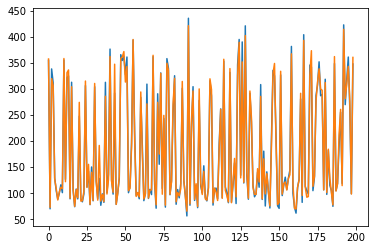

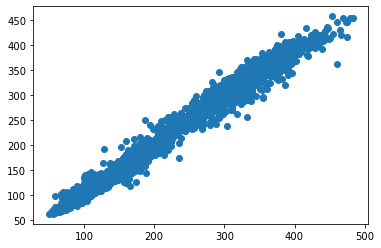

In [29]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [30]:
# Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
RF_errors = np.array([MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF])

7.547137495591043 130.7530921384038 11.434731835001807 0.06433406454030631


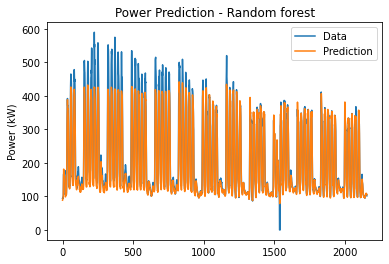

Text(0, 0.5, 'Power Prediction (kWh)')

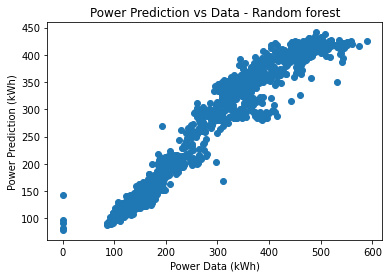

In [31]:
# 2019 data prediction
y2_pred_RF = RF_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_RF, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Random forest')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_RF) 
plt.title('Power Prediction vs Data - Random forest')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [32]:
# Evaluate errors from 2019 data prediction
MAE_RF=metrics.mean_absolute_error(Y2,y2_pred_RF) 
MSE_RF=metrics.mean_squared_error(Y2,y2_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(Y2)
print(MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF)
RF_errors2 = np.array([MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF])

18.892236746234108 998.0124448163863 31.591334964138287 0.14524670754577668


### Random forest uniformized data

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model = RandomForestRegressor(**parameters)
RF_model.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF = RF_model.predict(X_test_scaled)

C:\Users\Diana Sofia\AppData\Local\Temp\ipykernel_22280\1024093714.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train_scaled, y_train.reshape(-1,1))


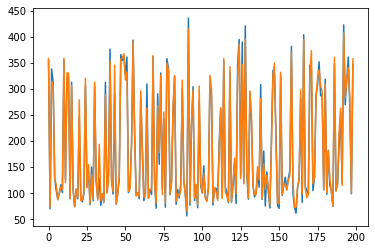

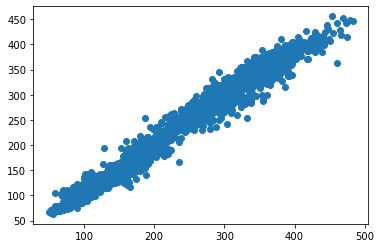

In [35]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [36]:
# Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
print(MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF)
RF_unif_errors = np.array([MAE_RF,MSE_RF,RMSE_RF,cvRMSE_RF])

8.573697237519076 160.94303421506436 12.68633257545554 0.0713758180310678


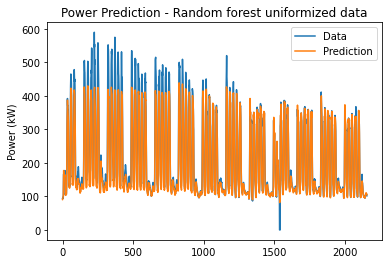

Text(0, 0.5, 'Power Prediction (kWh)')

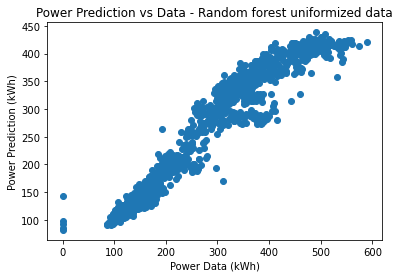

In [37]:
X2_scaled = scaler.transform(X2)
# 2019 data prediction
y2_pred_RF_unif = RF_model.predict(X2_scaled)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_RF_unif, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Random forest uniformized data')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_RF_unif)
plt.title('Power Prediction vs Data - Random forest uniformized data')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [38]:
# Evaluate errors from 2019 data prediction
MAE_RF=metrics.mean_absolute_error(Y2,y2_pred_RF_unif) 
MSE_RF=metrics.mean_squared_error(Y2,y2_pred_RF_unif)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_RF_unif))
cvRMSE_RF=RMSE_RF/np.mean(Y2)
print(MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF)
RF_unif_errors2 = np.array([MAE_RF, MSE_RF, RMSE_RF,cvRMSE_RF])

19.715001489176878 1063.0083183290355 32.603808340883056 0.1499017316090798


### Gradient Boosting

In [39]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

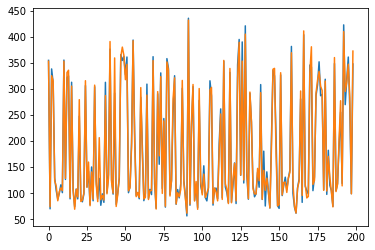

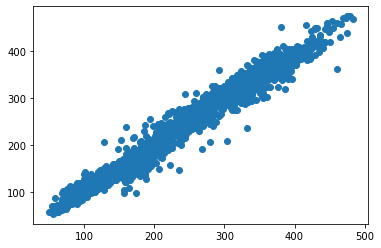

In [41]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [42]:
# Evaluate errors
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
print(MAE_GB,MSE_GB,RMSE_GB,cvRMSE_GB)
GB_errors = np.array([MAE_GB,MSE_GB,RMSE_GB,cvRMSE_GB])

8.340837531597002 163.98922704368815 12.805827854679608 0.07204812212326621


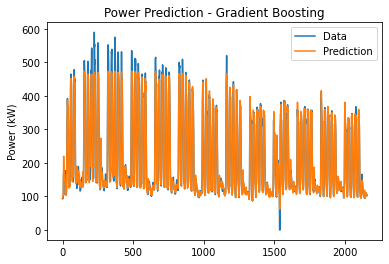

Text(0, 0.5, 'Power Prediction (kWh)')

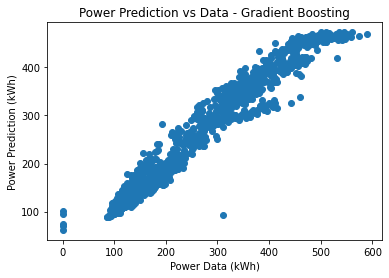

In [43]:
# 2019 data prediction
y2_pred_GB = GB_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_GB, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Gradient Boosting')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_GB) 
plt.title('Power Prediction vs Data - Gradient Boosting')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [44]:
# Evaluate errors from 2019 data prediction
MAE_GB=metrics.mean_absolute_error(Y2,y2_pred_GB) 
MSE_GB=metrics.mean_squared_error(Y2,y2_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(Y2)
print(MAE_GB, MSE_GB, RMSE_GB,cvRMSE_GB)
GB_errors2 = np.array([MAE_GB, MSE_GB, RMSE_GB,cvRMSE_GB])

14.379577560343057 504.3347280297125 22.457398069004174 0.10325182944217226


### Extreme Gradient Boosting

In [45]:
# Import libraries
from xgboost import XGBRegressor

C:\Users\Diana Sofia\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [46]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

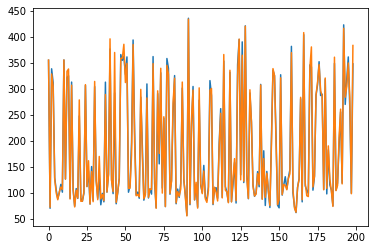

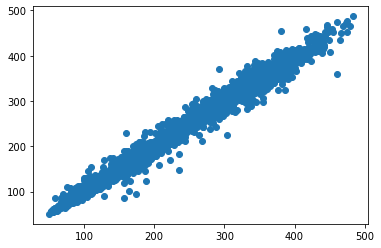

In [47]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [48]:
# Evaluate errors
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
print(MAE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB)
EGB_errors = np.array([MAE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB])

7.130251935656854 123.75463278974753 11.124505957108726 0.06258867234935393


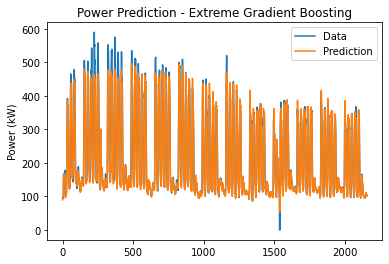

Text(0, 0.5, 'Power Prediction (kWh)')

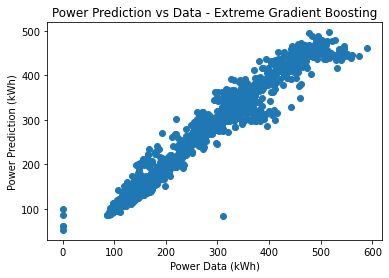

In [49]:
# 2019 data prediction
y2_pred_XGB = XGB_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_XGB, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Extreme Gradient Boosting')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_XGB) 
plt.title('Power Prediction vs Data - Extreme Gradient Boosting')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [50]:
# Evaluate errors from 2019 data prediction
MAE_XGB=metrics.mean_absolute_error(Y2,y2_pred_XGB) 
MSE_XGB=metrics.mean_squared_error(Y2,y2_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(Y2)
print(MAE_XGB, MSE_XGB, RMSE_XGB,cvRMSE_XGB)
EGB_errors2 = np.array([MAE_XGB, MSE_XGB, RMSE_XGB,cvRMSE_XGB])

13.667515886619647 549.3898096353249 23.43906588657758 0.10776521954005965


### Bootstrapping 

In [51]:
# Import libraries
from sklearn.ensemble import BaggingRegressor

In [52]:
BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

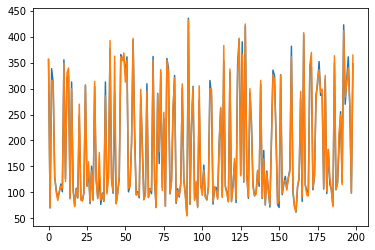

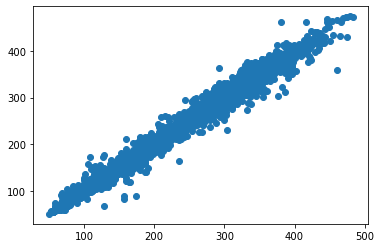

In [53]:
plt.plot(y_test[1:200])
plt.plot(y_pred_BT[1:200])
plt.show()
plt.scatter(y_test,y_pred_BT)

In [54]:
# Evaluate errors
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
print(MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT)
B_errors = np.array([MAE_BT,MSE_BT,RMSE_BT,cvRMSE_BT])

7.191671069635322 128.32453882170114 11.32804214424104 0.06373380722336788


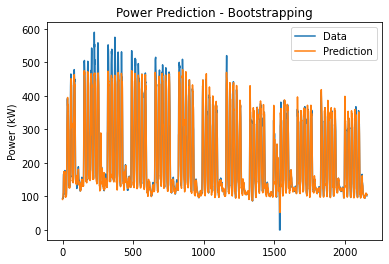

Text(0, 0.5, 'Power Prediction (kWh)')

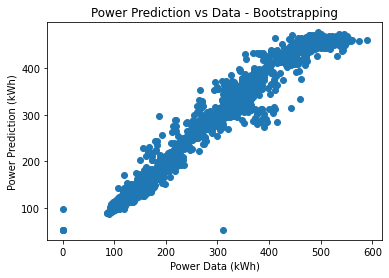

In [55]:
# 2019 data prediction
y2_pred_BT = BT_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_BT, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Bootstrapping')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_BT)  
plt.title('Power Prediction vs Data - Bootstrapping')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [56]:
# Evaluate errors from 2019 data prediction
MAE_BT=metrics.mean_absolute_error(Y2,y2_pred_BT) 
MSE_BT=metrics.mean_squared_error(Y2,y2_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(Y2)
print(MAE_BT, MSE_BT, RMSE_BT,cvRMSE_BT)
B_errors2 = np.array([MAE_BT, MSE_BT, RMSE_BT,cvRMSE_BT])

13.771850812144915 567.1747316769639 23.815430537300053 0.10949562208291232


### Neural Networks

In [57]:
# Import libraries
from sklearn.neural_network import MLPRegressor

In [58]:
NN_model = MLPRegressor(hidden_layer_sizes=(10,10,10,10))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)

C:\Users\Diana Sofia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


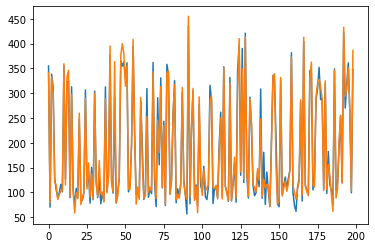

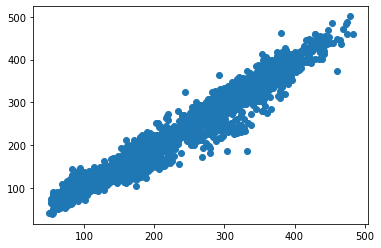

In [59]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [60]:
# Evaluate errors
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN) 
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
print(MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN)
NN_errors = np.array([MAE_NN,MSE_NN,RMSE_NN,cvRMSE_NN])

12.231155020231967 319.91658484681983 17.886212143626718 0.10063136967562386


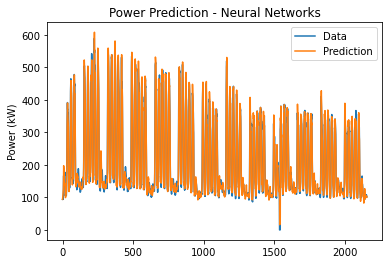

Text(0, 0.5, 'Power Prediction (kWh)')

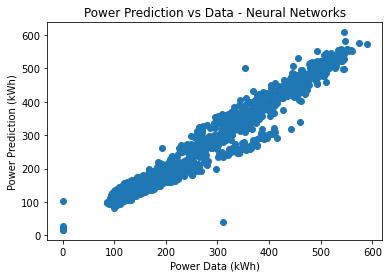

In [61]:
# 2019 data prediction
y2_pred_NN = NN_model.predict(X2)
plt.plot(Y2, label='Data') 
# Overimpose the predicted set on the real set
plt.plot(y2_pred_NN, label='Prediction')
plt.legend()
plt.ylabel('Power (kW)')
plt.title('Power Prediction - Neural Networks')
plt.show()
# Scatter plot showing a relation between the predicted and real values - the more linear the better
plt.scatter(Y2,y2_pred_NN) 
plt.title('Power Prediction vs Data - Neural Networks')
plt.xlabel('Power Data (kWh)')
plt.ylabel('Power Prediction (kWh)')

In [62]:
# Evaluate errors from 2019 data prediction
MAE_NN=metrics.mean_absolute_error(Y2,y2_pred_NN) 
MSE_NN=metrics.mean_squared_error(Y2,y2_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(Y2,y2_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(Y2)
print(MAE_NN, MSE_NN, RMSE_NN,cvRMSE_NN)
NN_errors2 = np.array([MAE_NN, MSE_NN, RMSE_NN,cvRMSE_NN])

15.356908188784844 569.6619565211076 23.86759218105395 0.10973544439570884


### Comparison between methods

In [63]:
# Save file with real data and predictions
df_pred=pd.DataFrame(data=[Y2,y2_pred_LR,y2_pred_SVR2,y2_pred_DT,y2_pred_RF,y2_pred_RF_unif,y2_pred_GB,y2_pred_XGB,y2_pred_BT,y2_pred_NN]).T
df_pred.rename(columns = {0:'data',1:'LR',2:'SVR',3:'DT',4:'RF',5:'RF_unif',6:'GB',7:'XGB',8:'BT',9:'NN'}, inplace = True)
df_model2 = pd.read_csv('clean.csv')
df_pred = df_pred.reset_index() 
df_pred['Date']=df_model2['Date']
df_pred = df_pred.drop(columns = ['index']) 
df_pred = df_pred.set_index('Date')
df_pred['SVR'] = df_pred['SVR'].str.get(0)
df_pred.to_csv('df_pred.csv', encoding='utf-8', index=True)
df_pred

,data,LR,SVR,DT,RF,RF_unif,GB,XGB,BT,NN
Date,,,,,,,,,,
2019-01-01 01:00:00,94.166,110.906724,77.680689,82.035839,88.617699,90.503065,92.343814,89.585632,90.905549,94.116999
2019-01-01 02:00:00,94.725,110.412613,78.599364,92.236962,90.669378,91.720086,93.961765,91.868301,92.28673,98.692571
2019-01-01 03:00:00,97.048,110.265261,81.460128,93.784588,91.064947,92.310486,94.356089,92.478996,92.458712,103.637787
2019-01-01 04:00:00,95.032,112.19744,89.390241,97.570135,95.07223,96.240503,99.56609,96.743706,97.112796,112.417833
2019-01-01 05:00:00,96.062,108.679436,91.968680,110.464476,97.303492,97.755566,101.132005,98.969727,108.560516,114.634526
...,...,...,...,...,...,...,...,...,...,...
2019-03-31 19:00:00,107.445,92.228341,109.661158,103.402512,105.337725,105.777154,102.631218,101.466255,105.369259,102.384662
2019-03-31 20:00:00,107.57,92.595471,110.770764,104.291152,106.507649,107.47948,103.005397,105.453568,105.903856,103.648122
2019-03-31 21:00:00,105.74,91.582668,111.262073,100.171911,106.689506,107.678985,105.45488,104.972168,105.055114,103.825813


In [64]:
# Save file with errors 
df_errors=pd.DataFrame(data=[LR_errors2,SVR_errors2,DTR_errors2,RF_errors2,RF_unif_errors2,GB_errors2,EGB_errors2,B_errors2,NN_errors2])
df_errors.rename(columns = {0:'MAE',1:'MSE',2:'RMSE',3:'cvRMSE'}, inplace = True)
df_errors = df_errors.set_index('MAE')
df_errors.to_csv('df_errors.csv', encoding='utf-8', index=True)
df_errors

,MSE,RMSE,cvRMSE
MAE,,,
20.862403,1063.473864,32.610947,0.149935
13.459443,444.889129,21.092395,0.096976
15.856509,740.740641,27.216551,0.125133
18.892237,998.012445,31.591335,0.145247
19.715001,1063.008318,32.603808,0.149902
14.379578,504.334728,22.457398,0.103252
13.667516,549.389810,23.439066,0.107765
13.771851,567.174732,23.815431,0.109496
15.356908,569.661957,23.867592,0.109735


In [65]:
# Save file with errors and forecasting method names
df_errors= df_errors.reset_index() 
new_col=['Linear Regression','Support Vector Regressor','Decision Tree Regressor','Random Forest','Random Forest Uniformized Data','Gradient Boosting','Extreme Gradient Boosting','Bootstrapping','Neural Networks']
df_errors.insert(loc=0, column='Forecasting Method', value=new_col)
df_errors = df_errors.set_index('Forecasting Method')
df_errors.to_csv('df_errors2.csv', encoding='utf-8', index=True)
df_errors

,MAE,MSE,RMSE,cvRMSE
Forecasting Method,,,,
Linear Regression,20.862403,1063.473864,32.610947,0.149935
Support Vector Regressor,13.459443,444.889129,21.092395,0.096976
Decision Tree Regressor,15.856509,740.740641,27.216551,0.125133
Random Forest,18.892237,998.012445,31.591335,0.145247
Random Forest Uniformized Data,19.715001,1063.008318,32.603808,0.149902
Gradient Boosting,14.379578,504.334728,22.457398,0.103252
Extreme Gradient Boosting,13.667516,549.389810,23.439066,0.107765
Bootstrapping,13.771851,567.174732,23.815431,0.109496
Neural Networks,15.356908,569.661957,23.867592,0.109735


In [66]:
# Print errors for 2019 data
print('Linear Regression', LR_errors2)
print('Support Vector Regressor', SVR_errors2)
print('Decision Tree Regressor', DTR_errors2)
print('Random forest', RF_errors2)
print('Random forest uniformized data', RF_unif_errors2)
print('Gradient Boosting', GB_errors2)
print('Extreme Gradient Boosting', EGB_errors2)
print('Bootstrapping', B_errors2)
print('Neural Networks', NN_errors2)

Linear Regression [2.08624034e+01 1.06347386e+03 3.26109470e+01 1.49934553e-01]
Support Vector Regressor [1.34594426e+01 4.44889129e+02 2.10923951e+01 9.69759885e-02]
Decision Tree Regressor [1.58565094e+01 7.40740641e+02 2.72165509e+01 1.25132870e-01]
Random forest [1.88922367e+01 9.98012445e+02 3.15913350e+01 1.45246708e-01]
Random forest uniformized data [1.97150015e+01 1.06300832e+03 3.26038083e+01 1.49901732e-01]
Gradient Boosting [1.43795776e+01 5.04334728e+02 2.24573981e+01 1.03251829e-01]
Extreme Gradient Boosting [1.36675159e+01 5.49389810e+02 2.34390659e+01 1.07765220e-01]
Bootstrapping [1.37718508e+01 5.67174732e+02 2.38154305e+01 1.09495622e-01]
Neural Networks [1.53569082e+01 5.69661957e+02 2.38675922e+01 1.09735444e-01]
